In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math
from scipy.stats import multivariate_normal

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
X = iris.data[:, :4]
y = iris.target
print(X)
print(y[0:150])
print(type(y))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
setosa = X[0:50]
virginica = X[50:100]
versicolor = X[100:150]

setosa_train, setosa_test, setosa_train_labels, setosa_test_labels = train_test_split(setosa, y[0:50], test_size = 0.2)
virginica_train, virginica_test, virginica_train_labels, virginica_test_labels = train_test_split(virginica, y[50:100], test_size = 0.2)
versicolor_train, versicolor_test, versicolor_train_labels, versicolor_test_labels = train_test_split(versicolor, y[100:150], test_size = 0.2)

In [6]:
print(setosa_train,  setosa_test, setosa_train_labels, setosa_test_labels, sep = '\n')

[[5.2 3.5 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [5.5 4.2 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [4.6 3.4 1.4 0.3]
 [5.1 3.8 1.5 0.3]
 [5.  3.4 1.6 0.4]
 [5.7 4.4 1.5 0.4]
 [4.5 2.3 1.3 0.3]
 [4.9 3.1 1.5 0.1]
 [5.4 3.4 1.7 0.2]
 [4.8 3.4 1.9 0.2]
 [5.1 3.8 1.6 0.2]
 [4.7 3.2 1.6 0.2]
 [5.4 3.7 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.6 3.2 1.4 0.2]
 [4.8 3.  1.4 0.1]
 [5.1 3.7 1.5 0.4]
 [4.4 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [4.8 3.1 1.6 0.2]
 [5.1 3.8 1.9 0.4]
 [5.2 3.4 1.4 0.2]
 [5.  3.3 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.5 3.5 1.3 0.2]
 [5.1 3.5 1.4 0.2]
 [5.1 3.5 1.4 0.3]
 [5.1 3.4 1.5 0.2]
 [5.3 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.  3.6 1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [5.  3.  1.6 0.2]]
[[5.4 3.9 1.3 0.4]
 [5.  3.4 1.5 0.2]
 [5.7 3.8 1.7 0.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.9 1.7 0.4]
 [5.1 3.3 1.7 0.5]
 [5.8 4.  1.2 0.2]
 [4.3 3.  1.1 0.1]
 [4.4 2.9 1.4 0.2]
 [5.  3.2 1.2 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [7]:
print(virginica_train,  virginica_test, virginica_train_labels, virginica_test_labels, sep = '\n')

[[6.2 2.9 4.3 1.3]
 [6.6 2.9 4.6 1.3]
 [5.8 2.7 4.1 1. ]
 [6.5 2.8 4.6 1.5]
 [5.6 3.  4.1 1.3]
 [5.1 2.5 3.  1.1]
 [6.1 2.8 4.7 1.2]
 [5.9 3.2 4.8 1.8]
 [5.7 2.8 4.5 1.3]
 [6.9 3.1 4.9 1.5]
 [5.6 3.  4.5 1.5]
 [5.7 3.  4.2 1.2]
 [5.5 2.6 4.4 1.2]
 [6.7 3.1 4.4 1.4]
 [5.8 2.6 4.  1.2]
 [5.6 2.5 3.9 1.1]
 [6.4 3.2 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [6.  2.7 5.1 1.6]
 [6.2 2.2 4.5 1.5]
 [5.6 2.7 4.2 1.3]
 [5.2 2.7 3.9 1.4]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [6.1 3.  4.6 1.4]
 [6.1 2.8 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [5.5 2.5 4.  1.3]
 [5.5 2.3 4.  1.3]
 [6.1 2.9 4.7 1.4]
 [6.3 2.3 4.4 1.3]
 [5.4 3.  4.5 1.5]
 [6.4 2.9 4.3 1.3]
 [5.8 2.7 3.9 1.2]
 [7.  3.2 4.7 1.4]
 [5.7 2.9 4.2 1.3]
 [5.  2.  3.5 1. ]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [6.  2.2 4.  1. ]]
[[5.9 3.  4.2 1.5]
 [5.5 2.4 3.7 1. ]
 [6.6 3.  4.4 1.4]
 [5.  2.3 3.3 1. ]
 [6.3 3.3 4.7 1.6]
 [5.7 2.8 4.1 1.3]
 [5.5 2.4 3.8 1.1]
 [4.9 2.4 3.3 1. ]
 [6.3 2.5 4.9 1.5]
 [5.6 2.9 3.6 1.3]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [8]:
print(versicolor_train,  versicolor_test, versicolor_train_labels, versicolor_test_labels, sep = '\n')

[[5.9 3.  5.1 1.8]
 [7.7 3.  6.1 2.3]
 [6.3 2.9 5.6 1.8]
 [7.7 2.8 6.7 2. ]
 [6.4 2.7 5.3 1.9]
 [6.2 2.8 4.8 1.8]
 [7.2 3.2 6.  1.8]
 [7.2 3.6 6.1 2.5]
 [6.  3.  4.8 1.8]
 [5.6 2.8 4.9 2. ]
 [6.5 3.  5.8 2.2]
 [6.5 3.2 5.1 2. ]
 [4.9 2.5 4.5 1.7]
 [6.7 3.3 5.7 2.1]
 [6.5 3.  5.5 1.8]
 [6.9 3.2 5.7 2.3]
 [7.7 3.8 6.7 2.2]
 [7.6 3.  6.6 2.1]
 [6.9 3.1 5.4 2.1]
 [6.4 3.1 5.5 1.8]
 [6.1 2.6 5.6 1.4]
 [5.8 2.8 5.1 2.4]
 [6.5 3.  5.2 2. ]
 [6.4 2.8 5.6 2.2]
 [6.3 3.4 5.6 2.4]
 [6.1 3.  4.9 1.8]
 [7.7 2.6 6.9 2.3]
 [7.2 3.  5.8 1.6]
 [7.3 2.9 6.3 1.8]
 [6.9 3.1 5.1 2.3]
 [6.4 3.2 5.3 2.3]
 [7.1 3.  5.9 2.1]
 [5.8 2.7 5.1 1.9]
 [5.7 2.5 5.  2. ]
 [6.2 3.4 5.4 2.3]
 [6.4 2.8 5.6 2.1]
 [6.3 2.7 4.9 1.8]
 [6.  2.2 5.  1.5]
 [6.7 3.1 5.6 2.4]
 [6.3 2.5 5.  1.9]]
[[6.7 3.  5.2 2.3]
 [6.7 3.3 5.7 2.5]
 [6.8 3.  5.5 2.1]
 [6.3 3.3 6.  2.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [6.3 2.8 5.1 1.5]
 [7.4 2.8 6.1 1.9]
 [7.9 3.8 6.4 2. ]
 [5.8 2.7 5.1 1.9]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [9]:
def computeMuSigma(x):
    mu = np.mean(x, axis = 0)
    mu = mu.reshape(4, 1)
    sigma = np.cov(x.T)
    det_sigma = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    return mu, sigma,  det_sigma, sigma_inv

In [10]:
mu1, sigma1, det_sigma1, sigma_inv1 = computeMuSigma(setosa_train)
print(mu1, sigma1, det_sigma1, sigma_inv1, sep = '\n')

[[4.98  ]
 [3.4   ]
 [1.47  ]
 [0.2275]]
[[0.09651282 0.08179487 0.01271795 0.00569231]
 [0.08179487 0.14461538 0.00974359 0.00794872]
 [0.01271795 0.00974359 0.02523077 0.00187179]
 [0.00569231 0.00794872 0.00187179 0.00717308]]
1.1376011125851078e-06
[[ 20.81656759 -11.23363764  -5.96823697  -2.51356225]
 [-11.23363764  13.55679397   0.89765529  -6.34233213]
 [ -5.96823697   0.89765529  42.84778801  -7.43954622]
 [ -2.51356225  -6.34233213  -7.43954622 150.37433656]]


In [11]:
mu2, sigma2, det_sigma2, sigma_inv2 = computeMuSigma(virginica_train)
print(mu2, sigma2, det_sigma2, sigma_inv2, sep = '\n')

[[5.9875]
 [2.7875]
 [4.325 ]
 [1.34  ]]
[[0.24983974 0.07189103 0.14724359 0.04102564]
 [0.07189103 0.09496795 0.07262821 0.03538462]
 [0.14724359 0.07262821 0.18448718 0.06102564]
 [0.04102564 0.03538462 0.06102564 0.03579487]]
2.0411642418587742e-05
[[  8.19751769  -2.75303189  -7.45592306   6.03743023]
 [ -2.75303189  18.13401052  -0.1277219  -14.55308408]
 [ -7.45592306  -0.1277219   19.61450932 -24.76848069]
 [  6.03743023 -14.55308408 -24.76848069  77.63062444]]


In [12]:
mu3, sigma3, det_sigma3, sigma_inv3 = computeMuSigma(versicolor_train)
print(mu3, sigma3, det_sigma3, sigma_inv3, sep = '\n')

[[6.55  ]
 [2.9575]
 [5.52  ]
 [2.0125]]
[[0.42205128 0.0875641  0.32897436 0.05833333]
 [0.0875641  0.09686538 0.06471795 0.04387821]
 [0.32897436 0.06471795 0.33138462 0.05      ]
 [0.05833333 0.04387821 0.05       0.06983974]]
0.00012043115871725334
[[ 11.23555182  -3.18050968 -10.55880853   0.17308616]
 [ -3.18050968  16.15688787   1.2699567   -8.40357244]
 [-10.55880853   1.2699567   13.49959085  -1.64336894]
 [  0.17308616  -8.40357244  -1.64336894  20.63016494]]


In [13]:
def classify_pi(x):
    P = np.zeros(3);
    
    P1 = multivariate_normal.pdf(x, mean=mu1.reshape(4), cov=sigma1)#computeMulProb(x, mu1,sigma_inverse1, det_sigma1)
    P[0] = P1
    
    P2 = y = multivariate_normal.pdf(x, mean=mu2.reshape(4), cov=sigma2)#computeMulProb(x, mu2,sigma_inverse2, det_sigma1)
    P[1] = P2
    
    P3 = y = multivariate_normal.pdf(x, mean=mu3.reshape(4), cov=sigma3)#computeMulProb(x, mu3,sigma_inverse3, det_sigma1)
    P[2] = P3 
    return (np.argmax(P))

In [14]:
setosa_test_predictions = np.zeros(10)
virginica_test_predictions = np.zeros(10)
versicolor_test_predictions = np.zeros(10)

for i in range(setosa_test.shape[0]):
    setosa_test_predictions[i] = classify_pi(setosa_test[i])
    
for i in range(virginica_test.shape[0]):
    virginica_test_predictions[i] = classify_pi(virginica_test[i])
    
for i in range(versicolor_test.shape[0]):
    versicolor_test_predictions[i] = classify_pi(versicolor_test[i])

In [15]:
print(setosa_test_predictions)
print(virginica_test_predictions)
print(versicolor_test_predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 1. 2. 2. 2.]


In [16]:
def evaluate_accuracy(predictions, labels):
    return np.sum( np.array(predictions == labels) ) / len(predictions)

In [17]:
training_accuracy = np.zeros(4)
training_accuracy[0] = evaluate_accuracy(setosa_test_predictions, setosa_test_labels)
training_accuracy[1] = evaluate_accuracy(virginica_test_predictions, virginica_test_labels)
training_accuracy[2] = evaluate_accuracy(versicolor_test_predictions, versicolor_test_labels)
print(training_accuracy) 

[1.  1.  0.9 0. ]


In [18]:
test_predictions = np.append(np.append(setosa_test_predictions, virginica_test_predictions), versicolor_test_predictions)
print(test_predictions)
test_labels = np.append(np.append(setosa_test_labels, virginica_test_labels), versicolor_test_labels)
training_accuracy[3] = evaluate_accuracy(test_predictions, test_labels)
print(training_accuracy[3])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2.]
0.9666666666666667


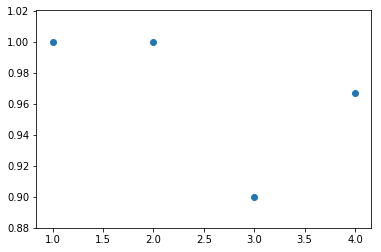

In [19]:
plt.scatter([1, 2, 3, 4], training_accuracy)